2025-02-08

Craig W. Christensen 

Trying a few routes to try and get 3D tiles in Cesium. 

Option 1: use vtkCesium3DTilesWriter, recommended by this post by Kitware: https://www.kitware.com/3d-tiles-generation-using-vtk/

Option 2: convert each cell face to a polygon, and export to GLTF

Neither routes proved promising

In [2]:
import pyvista as pv

In [3]:
ugrid = pv.read("../data/FRE16/other/AEM-resistivity-model-compressed.vtu")


In [3]:
# Extract the points as a PointSet
point_set = pv.PolyData(ugrid.points)

# Copy point data arrays from the UnstructuredGrid to the PointSet
for name in ugrid.point_data:
    point_set.point_data[name] = ugrid.point_data[name]
point_set

PolyData (0x1225522e0)
  N Cells:    320053
  N Points:   320053
  N Strips:   0
  X Bounds:   5.668e+05, 5.689e+05
  Y Bounds:   6.663e+06, 6.671e+06
  Z Bounds:   -3.372e+02, 1.394e+02
  N Arrays:   6

In [4]:
# Save the PointSet as a .vtp file
vtk_file = "../data/FRE16/other/AEM-resistivity-model-compressed.vtk"
point_set.save(vtk_file)

In [5]:
import vtk

# Read the .vtk file
reader = vtk.vtkGenericDataObjectReader()
reader.SetFileName(vtk_file)
reader.Update()

poly_data = reader.GetOutput()

# # Create the writer
# tilesWriter = vtk.vtkCesium3DTilesWriter()
# tilesWriter.SetInputConnection(reader.GetOutputPort())

# # Set the output directory for the 3D tiles
# tilesWriter.SetDirectoryName("../data/FRE16/cesium_3d_tile/")

# # Write the 3D tiles
# tilesWriter.Write()

In [ ]:
# Create a vtkMultiBlockDataSet and add the vtkPolyData to it
multi_block = vtk.vtkMultiBlockDataSet()
multi_block.SetBlock(0, poly_data)

# Create the writer
tilesWriter = vtk.vtkCesium3DTilesWriter()
tilesWriter.SetInputData(multi_block)

# Set the output directory for the 3D tiles
tilesWriter.SetDirectoryName("../data/FRE16/cesium_3d_tile/")

# Write the 3D tiles
tilesWriter.Write()

# unstructured grid to polydata then gltf?

In [5]:
dir(ugrid)

['ALL_PIECES_EXTENT',
 'AddObserver',
 'AddReferenceToCell',
 'Allocate',
 'AllocateCellGhostArray',
 'AllocateEstimate',
 'AllocateExact',
 'AllocatePointGhostArray',
 'AttributeTypes',
 'BOUNDING_BOX',
 'BreakOnError',
 'BuildCellLocator',
 'BuildLinks',
 'BuildLocator',
 'BuildPointLocator',
 'CELL',
 'CELL_DATA_FIELD',
 'CELL_DATA_VECTOR',
 'CheckAttributes',
 'ComputeBounds',
 'ConvertFaceStreamPointIds',
 'CopyAttributes',
 'CopyInformationFromPipeline',
 'CopyInformationToPipeline',
 'CopyStructure',
 'Crop',
 'DATA_EXTENT',
 'DATA_EXTENT_TYPE',
 'DATA_NUMBER_OF_GHOST_LEVELS',
 'DATA_NUMBER_OF_PIECES',
 'DATA_OBJECT',
 'DATA_OBJECT_FIELD',
 'DATA_PIECE_NUMBER',
 'DATA_TIME_STEP',
 'DATA_TYPE_NAME',
 'DIRECTION',
 'DataHasBeenGenerated',
 'DebugOff',
 'DebugOn',
 'DecomposeAPolyhedronCell',
 'DeepCopy',
 'EDGE',
 'EDGE_DATA_VECTOR',
 'EditableOff',
 'EditableOn',
 'ExtendedNew',
 'FIELD',
 'FIELD_ACTIVE_ATTRIBUTE',
 'FIELD_ARRAY_TYPE',
 'FIELD_ASSOCIATION',
 'FIELD_ASSOCIATION_CE

In [15]:
ugrid.bounds

(566823.6875,
 568898.8125,
 6663499.0,
 6670954.0,
 -337.1600036621094,
 139.35415649414062)

In [23]:
clipped = ugrid.clip(normal='y', origin=(0,6670954-200, 0), invert=False)

In [24]:
# Initialize a list to store the PolyData for each face
faces_polydata = []

# Iterate through each cell in the grid
for i in range(clipped.n_cells):
    if i%100==0: print(f'{i} of {clipped.n_cells}')
    cell = clipped.extract_cells(i)
    cell_faces = cell.extract_surface()
    
    # Carry over cell_data attributes
    for key in clipped.cell_data.keys():
        if key =='resist':
            cell_faces.cell_data[key] = [clipped.cell_data[key][i]] * cell_faces.n_cells
    
    faces_polydata.append(cell_faces)

0 of 5167
100 of 5167
200 of 5167
300 of 5167
400 of 5167
500 of 5167
600 of 5167
700 of 5167
800 of 5167
900 of 5167
1000 of 5167
1100 of 5167
1200 of 5167
1300 of 5167
1400 of 5167
1500 of 5167
1600 of 5167
1700 of 5167
1800 of 5167
1900 of 5167
2000 of 5167
2100 of 5167
2200 of 5167
2300 of 5167
2400 of 5167
2500 of 5167
2600 of 5167
2700 of 5167
2800 of 5167
2900 of 5167
3000 of 5167
3100 of 5167
3200 of 5167
3300 of 5167
3400 of 5167
3500 of 5167
3600 of 5167
3700 of 5167
3800 of 5167
3900 of 5167
4000 of 5167
4100 of 5167
4200 of 5167
4300 of 5167
4400 of 5167
4500 of 5167
4600 of 5167
4700 of 5167
4800 of 5167
4900 of 5167
5000 of 5167
5100 of 5167


In [26]:
merged = pv.merge(faces_polydata, merge_points=False, progress_bar=True)

Merging: 100%|█████████████████████████████████████████████████████[00:00<00:00]


/Users/craigchristensen/virtual-envs/dev_EMerald_Interpret_2023-12-06-v.0.14.3/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame.ui.vuetify'

Falling back to a static output.
  warnings.warn(


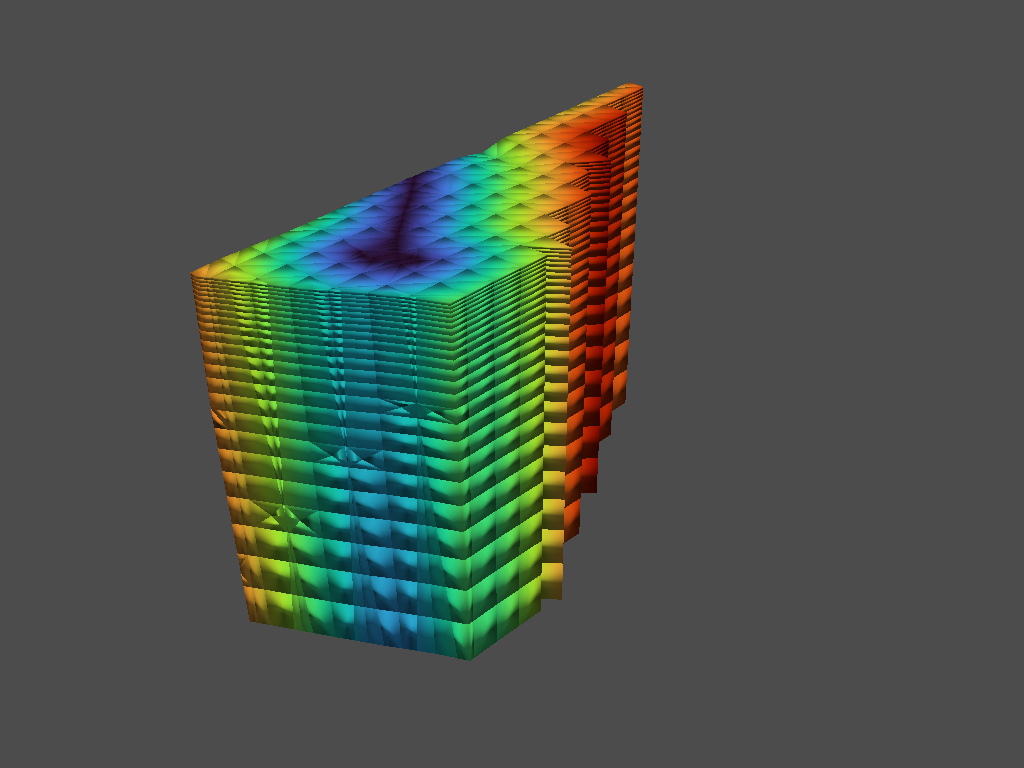

In [35]:
pl = pv.Plotter()
_ = pl.add_mesh(
    merged,
    cmap='turbo',
    smooth_shading=True,
    show_scalar_bar=False,
)
pl.export_gltf('test-export-plotted_scene.gltf')
pl.show()

In [36]:
merged.save("merged-polydata.vtp")